In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 5
$(ii)$ Calcule los puntos de inflexión para este perfil en términos de $\alpha=a / L$. Sabiendo que $|z| \leq \alpha$ y usando el criterio de Rayleigh, ¿para que valores de $\alpha$ espera que el fujo sea estable? \newline

$(iii)_{(N)}$ Obtenga la relación de dispersión $\omega(k)=\omega_0(k)+i \gamma(k)$ para valores de $0,5 \leq \alpha \leq 2$, variando los valores del número de onda adimensional $0<k^{\prime} \leq 2,5$ y con $d z=5 \times 10^{-3}$. Relacione el resultado con lo obtenido en el inciso anterior. Ayuda: $A l$ igual que en el Problema 4 , evite $k^{\prime}=0$.

In [10]:
dz = 5e-3
zs = np.arange(dz,1,dz)
U = 1/(np.cosh(zs)**2)
U_pp = -4/(np.cosh(zs)**2)+6/(np.cosh(zs)**4)

In [25]:
ks =np.arange(.1,1.5,.1)
ws = []
for k in ks:
    M, L = construir_matrices_inestabilidades(zs, U, U_pp, k)

    w = omega(M, L, k)
    ws.append(w)
    
print(ws)

[9.752524258876961e-06, 0.3970054058688525, 2.9477554825008137e-05, 3.956004874927643e-05, 0.9925111004100583, 1.1910126536598107, 1.3895141589733875, 1.58801569106772, 1.7865173246593582, 1.9850191344644972, 2.183521195198928, 2.3820235815781317, 2.5805263683171358, 2.7790296301306294]


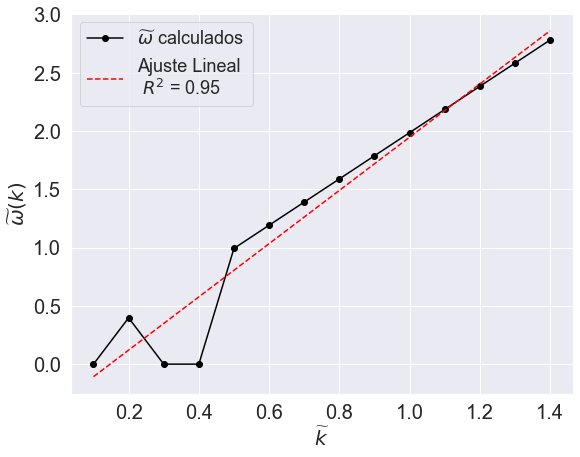

m = [ 2.28166732 -0.33590942] 
 b = [ 2.28166732 -0.33590942] 
 error = 0.20173405411121184
 R^2: 0.9456191588534649


In [26]:
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
sns.set_theme()


#esta es la funcion que queremos ajustar (una lineal)
def linear(k,m,b):
    return k*m + b

#hago el ajuste
params, params_cov = curve_fit(linear,ks,ws, p0=[1,0]) 
  
#ploteo datos y ajuste
plt.figure(figsize = (9,7))
plt.clf()
plt.plot(ks,ws,'-o',color ='black',label ="$\widetilde{\omega}$ calculados")
plt.plot(ks,linear(ks,*params),'--',label=f'Ajuste Lineal \n $R^2$ = {np.round(r2_score(linear(ks,*params), ws),2)}',color='red')


plt.xlabel("$\widetilde{k}$ ",fontsize=20) #FIJARSE LAS UNIDADES
plt.ylabel("$\widetilde{\omega} (k)$",fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.legend(fontsize=18)
plt.show()


print(f'm = {params} \n b = {params} \n error = {np.sqrt(np.sum(np.diag(params_cov)))}')

#caluclo el R^2

print(f' R^2: {r2_score(linear(ks,*params), ws)}')



## Ejercicio 10

In [27]:
k = 0.25
g = 9.8
h = 1
h_ = 1
ro = 1
ro_ =0.5

""""
C = np.array([[np.exp(k*h),-np.exp(-k*h),0,0],
              [1,-1,-1,1],
              [ro*(1-w**2/(k*g)),-ro*(1+w**2/(k*g)),-ro_*(1-w**2/(k*g)),ro_*(1+w**2/(k*g))],
              [0,0,np.exp(-k*h_),-np.exp(k*h_)]])
"""
M = np.array([[np.exp(k*h),-np.exp(-k*h),0,0],
              [1,-1,-1,1],
              [ro,-ro,-ro_,ro_],
              [0,0,np.exp(-k*h_),-np.exp(k*h_)]])
L = np.array([[0,0,0,0],
             [0,0,0,0],
             [ro,ro,-ro_,-ro_],
             [0,0,0,0]])

In [30]:
A = np.matmul(np.linalg.inv(M), L)    
eigval, eigvect = np.linalg.eig(A) 
w = np.sqrt(eigval*k*g)
idx = np.argmax(w.imag)            # BUSCO LA FRECUENCIA MAS INESTABLE
print(w[idx])

5.4781349940733435j


In [8]:
def construir_matrices_inestabilidades(zs, U, Upp, k):
    """
    Construye las matrices M y L asociadas al problema de Rayleigh en términos
    del perfil de velocidades, la discretización espacial y el número de onda.

    Parámetros:
      zs : Discretización del espacio (sin incluir los bordes)
      U  : Perfil de velocidades evaluado sobre los zs
      Upp: Derivada segunda del perfil evaluada sobre los zs
      k  : Número de onda de la perturbación
    """
    dz = zs[1] - zs[0]
    N = U.size

    Ld = - 2*U - dz**2*(U*k**2 + Upp)                            # DIAGONAL DE L
    Lup = U[:-1]                                                 # DIAG SUP DE L
    Llow = U[1:]                                                 # DIAG INF DE L
    L = np.diag(Ld,k=0) + np.diag(Lup,k=1) + np.diag(Llow,k=-1)  # CONSTRUCCIÓN DE L

    # COMPLETAR LA MATRIZ M
    Md = -2-k*dz**2 * np.ones(N)                      # DIAGONAL DE M
    Mup = dz**2 * np.ones(N-1)                                               # DIAG SUP DE M
    Mlow = dz**2 * np.ones(N-1)                                                # DIAG INF DE M
    M = np.diag(Md,k=0) + np.diag(Mup,k=1) + np.diag(Mlow,k=-1)  # CONSTRUCCIÓN DE M

    return M, L

def omega(M, L, k):
    """
    Calcula los autovectores y autovalores del problema a partir de
    M y L, a los últimos los divide por k para obtener w y devuelve
    solo la frecuencia del modo más inestable.
    """
    A = np.matmul( np.linalg.inv(M), L)                              # DEFINIR LA MATRIZ A = M^(-1)L
    eigval, eigvect = np.linalg.eig(A)               # CALCULAR AUTOVALORES Y AUTOVECTORES
    w = eigval*k                               # CALCULO LAS FRECUENCIAS
    idx = np.argmax(w.imag)            # BUSCO LA FRECUENCIA MAS INESTABLE
    return w[idx]